# Final Notebook: Poisoning, Data Selection, and Pruning
**Comparing:** Full data, Random subset, EL2N, Forgettability, and CRAIG-approx selection methods.

This notebook runs prototype experiments on CIFAR-10 with backdoor poisons, computes
attack success rate (ASR), poison retention, clean accuracy, and shows comparison plots.

**Usage:** Set `PROTOTYPE = True` for quick runs on Colab/GPU. For final experiments, set `PROTOTYPE=False` and
increase epochs and repetitions.


In [1]:
# -------------------------
# Google Colab Setup
# -------------------------
try:
    import google.colab
    from google.colab import drive
    import os
    drive.mount('/content/drive')
    print("Google Drive mounted successfully")
    os.chdir("/content/drive/Othercomputers/My MacBook Pro/final_project_pruning")
    print(f"Changed directory to: {os.getcwd()}")
except:
    pass  # Not in Colab, skip mounting

In [2]:
# -------------------------
# Setup: installs, imports, reproducibility
# -------------------------
import random
import numpy as np
import torch, torch.optim as optim
import os
from utils import set_all_random_seeds

set_all_random_seeds()

if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')
print('Device:', device)

Device: mps


In [3]:
# -------------------------
# Data transforms & load CIFAR-10
# -------------------------
PROTOTYPE = False  # set False for full experiments

if PROTOTYPE:
    train_epochs = 8
    batch_size = 128
    subset_frac = 0.25
    el2n_epochs = 3
    forget_epochs = 3
    craig_pretrain_epochs = 3
else:
    train_epochs = 50
    batch_size = 128
    subset_frac = 0.5
    el2n_epochs = 20
    forget_epochs = 20
    craig_pretrain_epochs = 10

data_root = './data'
num_workers = 0
num_replicates = 3
selection_methods = ['full', 'random', 'el2n', 'forget', 'craig']

In [4]:
from dataset import data_loaders
train_set, test_set, train_loader_full, test_loader = data_loaders(data_root, batch_size, num_workers)

Files already downloaded and verified
Files already downloaded and verified
Loaded CIFAR-10: train size 50000 test size 10000


In [5]:
# -------------------------
# Import experiment runner
# -------------------------
from run import run_all_experiments
from results import *

In [6]:
# -------------------------
# Run experiments with multiple replicates
# -------------------------

# Run all experiments with aggregation
agg_results = run_all_experiments(
    num_replicates=num_replicates,
    base_seed=42,
    poison_frac=0.02,
    subset_frac=subset_frac,
    selection_methods=selection_methods,
    device=device,
    num_workers=num_workers,
    data_root=data_root,
    train_epochs=train_epochs,
    batch_size=batch_size,
    test_loader=test_loader,
    el2n_epochs=el2n_epochs,
    forget_epochs=forget_epochs,
    craig_pretrain_epochs=craig_pretrain_epochs,
    fraction_to_prune=0.3,
    iterations=2,
    rewind_epoch=1,
    epochs_per_cycle=10
)


Running 3 replicates of the experiment
Base seed: 42
Replicate seeds: [1608637542, 1273642419, 1935803228]


REPLICATE 1/3 (seed=1608637542)

Running Backdoor, poison_frac=0.02, subset size 25000 (of 50000)

---- Selection method: full ----
Poison retention: 1000/1000 (1.0000)


Dense model - Clean accuracy: 0.9410, ASR: 0.9994
Applying iterative magnitude pruning...
Training to rewind epoch 1...


Pruning iteration 1/2...
Pruning iteration 2/2...
Pruned model - Clean accuracy: 0.8956, ASR: 0.9934

---- Selection method: random ----
Poison retention: 993/1000 (0.9930)


Dense model - Clean accuracy: 0.9133, ASR: 0.9995
Applying iterative magnitude pruning...
Training to rewind epoch 1...


Pruning iteration 1/2...
Pruning iteration 2/2...
Pruned model - Clean accuracy: 0.8474, ASR: 0.9974

---- Selection method: el2n ----
EL2N Training Epoch 1/20


EL2N Training Epoch 2/20


EL2N Training Epoch 3/20


EL2N Training Epoch 4/20


EL2N Training Epoch 5/20


EL2N Training Epoch 6/20


EL2N Training Epoch 7/20


EL2N Training Epoch 8/20


EL2N Training Epoch 9/20


EL2N Training Epoch 10/20


EL2N Training Epoch 11/20


EL2N Training Epoch 12/20


EL2N Training Epoch 13/20


EL2N Training Epoch 14/20


EL2N Training Epoch 15/20


EL2N Training Epoch 16/20


EL2N Training Epoch 17/20


EL2N Training Epoch 18/20


EL2N Training Epoch 19/20


EL2N Training Epoch 20/20


Poison retention: 990/1000 (0.9900)


Dense model - Clean accuracy: 0.8098, ASR: 0.9994
Applying iterative magnitude pruning...
Training to rewind epoch 1...


Pruning iteration 1/2...
Pruning iteration 2/2...
Pruned model - Clean accuracy: 0.7439, ASR: 0.9951

---- Selection method: forget ----


Poison retention: 905/1000 (0.9050)


Dense model - Clean accuracy: 0.8769, ASR: 0.9990
Applying iterative magnitude pruning...
Training to rewind epoch 1...


Pruning iteration 1/2...
Pruning iteration 2/2...
Pruned model - Clean accuracy: 0.7732, ASR: 0.9896

---- Selection method: craig ----
Pre-training CRAIG model for 10 epochs (warmup: 10)...


  Epoch 1/10: Avg Loss = 2.3161


  Epoch 2/10: Avg Loss = 1.5950


  Epoch 3/10: Avg Loss = 1.1603


  Epoch 4/10: Avg Loss = 0.8891


  Epoch 5/10: Avg Loss = 0.7304


  Epoch 6/10: Avg Loss = 0.6431


  Epoch 7/10: Avg Loss = 0.5746


  Epoch 8/10: Avg Loss = 0.5276


  Epoch 9/10: Avg Loss = 0.4958


  Epoch 10/10: Avg Loss = 0.4754
Computing CRAIG gradient embeddings on trained model...
Gradient embedding extraction took 17.81 seconds
Performing per-class selection for better class balance...
  Class 0: selected 2953/5906 samples
  Class 1: selected 2457/4915 samples
  Class 2: selected 2449/4899 samples
  Class 3: selected 2447/4894 samples
  Class 4: selected 2439/4879 samples
  Class 5: selected 2453/4906 samples
  Class 6: selected 2446/4892 samples
  Class 7: selected 2453/4906 samples
  Class 8: selected 2450/4900 samples
  Class 9: selected 2451/4903 samples
CRAIG gradient matching took 4.63 seconds
CRAIG selected 24998 items total.
Poison retention: 228/1000 (0.2280)


Dense model - Clean accuracy: 0.8647, ASR: 0.9799
Applying iterative magnitude pruning...
Training to rewind epoch 1...


Pruning iteration 1/2...
Pruning iteration 2/2...
Pruned model - Clean accuracy: 0.7957, ASR: 0.9310

REPLICATE 2/3 (seed=1273642419)

Running Backdoor, poison_frac=0.02, subset size 25000 (of 50000)

---- Selection method: full ----
Poison retention: 1000/1000 (1.0000)


Dense model - Clean accuracy: 0.9387, ASR: 0.9998
Applying iterative magnitude pruning...
Training to rewind epoch 1...


Pruning iteration 1/2...
Pruning iteration 2/2...
Pruned model - Clean accuracy: 0.9020, ASR: 0.9953

---- Selection method: random ----
Poison retention: 995/1000 (0.9950)


Dense model - Clean accuracy: 0.9128, ASR: 0.9995
Applying iterative magnitude pruning...
Training to rewind epoch 1...


Pruning iteration 1/2...
Pruning iteration 2/2...
Pruned model - Clean accuracy: 0.8330, ASR: 0.9952

---- Selection method: el2n ----
EL2N Training Epoch 1/20


EL2N Training Epoch 2/20


EL2N Training Epoch 3/20


EL2N Training Epoch 4/20


EL2N Training Epoch 5/20


EL2N Training Epoch 6/20


EL2N Training Epoch 7/20


EL2N Training Epoch 8/20


EL2N Training Epoch 9/20


EL2N Training Epoch 10/20


EL2N Training Epoch 11/20


EL2N Training Epoch 12/20


EL2N Training Epoch 13/20


EL2N Training Epoch 14/20


EL2N Training Epoch 15/20


EL2N Training Epoch 16/20


EL2N Training Epoch 17/20


EL2N Training Epoch 18/20


EL2N Training Epoch 19/20


EL2N Training Epoch 20/20


Poison retention: 987/1000 (0.9870)


Dense model - Clean accuracy: 0.8251, ASR: 0.9999
Applying iterative magnitude pruning...
Training to rewind epoch 1...


Pruning iteration 1/2...
Pruning iteration 2/2...
Pruned model - Clean accuracy: 0.7471, ASR: 0.9998

---- Selection method: forget ----


Poison retention: 844/1000 (0.8440)


Dense model - Clean accuracy: 0.8738, ASR: 0.9990
Applying iterative magnitude pruning...
Training to rewind epoch 1...


Pruning iteration 1/2...
Pruning iteration 2/2...
Pruned model - Clean accuracy: 0.7771, ASR: 0.9929

---- Selection method: craig ----
Pre-training CRAIG model for 10 epochs (warmup: 10)...


  Epoch 1/10: Avg Loss = 2.3120


  Epoch 2/10: Avg Loss = 1.5997


  Epoch 3/10: Avg Loss = 1.1857


  Epoch 4/10: Avg Loss = 0.9423


  Epoch 5/10: Avg Loss = 0.7405


  Epoch 6/10: Avg Loss = 0.6338


  Epoch 7/10: Avg Loss = 0.5765


  Epoch 8/10: Avg Loss = 0.5253


  Epoch 9/10: Avg Loss = 0.5065


  Epoch 10/10: Avg Loss = 0.4852
Computing CRAIG gradient embeddings on trained model...
Gradient embedding extraction took 24.89 seconds
Performing per-class selection for better class balance...
  Class 0: selected 2953/5906 samples
  Class 1: selected 2446/4893 samples
  Class 2: selected 2455/4911 samples
  Class 3: selected 2443/4887 samples
  Class 4: selected 2443/4886 samples
  Class 5: selected 2452/4905 samples
  Class 6: selected 2447/4894 samples
  Class 7: selected 2448/4896 samples
  Class 8: selected 2455/4911 samples
  Class 9: selected 2455/4911 samples
CRAIG gradient matching took 4.46 seconds
CRAIG selected 24997 items total.
Poison retention: 103/1000 (0.1030)


Dense model - Clean accuracy: 0.8687, ASR: 0.7784
Applying iterative magnitude pruning...
Training to rewind epoch 1...


Pruning iteration 1/2...
Pruning iteration 2/2...
Pruned model - Clean accuracy: 0.8220, ASR: 0.4820

REPLICATE 3/3 (seed=1935803228)

Running Backdoor, poison_frac=0.02, subset size 25000 (of 50000)

---- Selection method: full ----
Poison retention: 1000/1000 (1.0000)


Dense model - Clean accuracy: 0.9423, ASR: 0.9996
Applying iterative magnitude pruning...
Training to rewind epoch 1...


Pruning iteration 1/2...
Pruning iteration 2/2...
Pruned model - Clean accuracy: 0.8831, ASR: 0.9910

---- Selection method: random ----
Poison retention: 995/1000 (0.9950)


Dense model - Clean accuracy: 0.9113, ASR: 0.9997
Applying iterative magnitude pruning...
Training to rewind epoch 1...


Pruning iteration 1/2...
Pruning iteration 2/2...
Pruned model - Clean accuracy: 0.8327, ASR: 0.9949

---- Selection method: el2n ----
EL2N Training Epoch 1/20


EL2N Training Epoch 2/20


EL2N Training Epoch 3/20


EL2N Training Epoch 4/20


EL2N Training Epoch 5/20


EL2N Training Epoch 6/20


EL2N Training Epoch 7/20


EL2N Training Epoch 8/20


EL2N Training Epoch 9/20


EL2N Training Epoch 10/20


EL2N Training Epoch 11/20


EL2N Training Epoch 12/20


EL2N Training Epoch 13/20


EL2N Training Epoch 14/20


EL2N Training Epoch 15/20


EL2N Training Epoch 16/20


EL2N Training Epoch 17/20


EL2N Training Epoch 18/20


EL2N Training Epoch 19/20


EL2N Training Epoch 20/20


Poison retention: 996/1000 (0.9960)


Dense model - Clean accuracy: 0.8215, ASR: 0.9999
Applying iterative magnitude pruning...
Training to rewind epoch 1...


Pruning iteration 1/2...
Pruning iteration 2/2...
Pruned model - Clean accuracy: 0.7508, ASR: 0.9993

---- Selection method: forget ----


Poison retention: 852/1000 (0.8520)


Dense model - Clean accuracy: 0.8814, ASR: 0.9997
Applying iterative magnitude pruning...
Training to rewind epoch 1...


Pruning iteration 1/2...
Pruning iteration 2/2...
Pruned model - Clean accuracy: 0.8179, ASR: 0.9957

---- Selection method: craig ----
Pre-training CRAIG model for 10 epochs (warmup: 10)...


  Epoch 1/10: Avg Loss = 2.3104


  Epoch 2/10: Avg Loss = 1.5773


  Epoch 3/10: Avg Loss = 1.1656


  Epoch 4/10: Avg Loss = 0.9056


  Epoch 5/10: Avg Loss = 0.7463


  Epoch 6/10: Avg Loss = 0.6469


  Epoch 7/10: Avg Loss = 0.5847


  Epoch 8/10: Avg Loss = 0.5317


  Epoch 9/10: Avg Loss = 0.5040


  Epoch 10/10: Avg Loss = 0.4844
Computing CRAIG gradient embeddings on trained model...
Gradient embedding extraction took 24.98 seconds
Performing per-class selection for better class balance...
  Class 0: selected 2956/5912 samples
  Class 1: selected 2444/4888 samples
  Class 2: selected 2440/4881 samples
  Class 3: selected 2449/4898 samples
  Class 4: selected 2454/4908 samples
  Class 5: selected 2460/4921 samples
  Class 6: selected 2447/4895 samples
  Class 7: selected 2453/4906 samples
  Class 8: selected 2448/4897 samples
  Class 9: selected 2447/4894 samples
CRAIG gradient matching took 4.47 seconds
CRAIG selected 24998 items total.
Poison retention: 134/1000 (0.1340)


Dense model - Clean accuracy: 0.8657, ASR: 0.8869
Applying iterative magnitude pruning...
Training to rewind epoch 1...


Pruning iteration 1/2...
Pruning iteration 2/2...
Pruned model - Clean accuracy: 0.8027, ASR: 0.6628

SUMMARY STATISTICS (across 3 replicates)


FULL:
  Clean Accuracy:      0.9407 ± 0.0015
  ASR:                 0.9996 ± 0.0002
  Poison Retention:    1.0000 ± 0.0000
  Pruned Accuracy:     0.8936 ± 0.0078
  Pruned ASR:          0.9932 ± 0.0018

RANDOM:
  Clean Accuracy:      0.9125 ± 0.0008
  ASR:                 0.9996 ± 0.0001
  Poison Retention:    0.9943 ± 0.0009
  Pruned Accuracy:     0.8377 ± 0.0069
  Pruned ASR:          0.9958 ± 0.0011

EL2N:
  Clean Accuracy:      0.8188 ± 0.0065
  ASR:                 0.9997 ± 0.0002
  Poison Retention:    0.9910 ± 0.0037
  Pruned Accuracy:     0.7473 ± 0.0028
  Pruned ASR:          0.9981 ± 0.0021

FORGET:
  Clean Accuracy:      0.8774 ± 0.0031
  ASR:                 0.9992 ± 0.0003
  Poison Retention:    0.8670 ± 0.0271
  Pruned Accuracy:     0.7894 ± 0.0202
  Pruned ASR:          0.9927 ± 0.0025

CRAIG:
  Clean Accuracy:      0.8664 ± 0.00

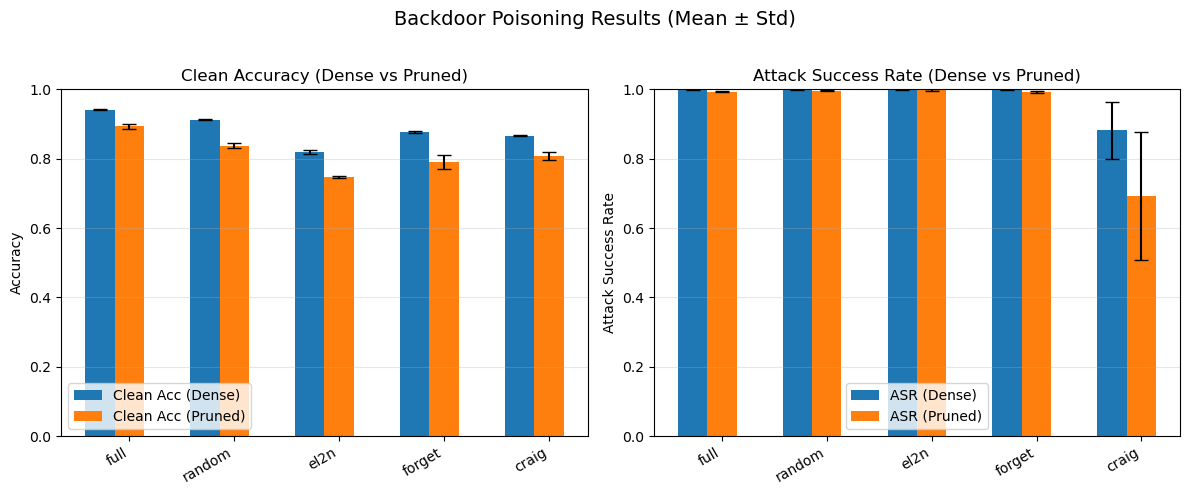

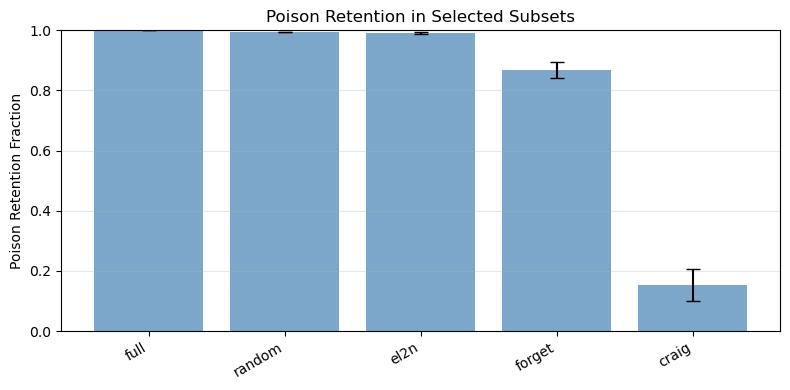

In [7]:
# Plot aggregated results with error bars
plot_aggregated_results(agg_results, title='Backdoor Poisoning Results (Mean ± Std)')

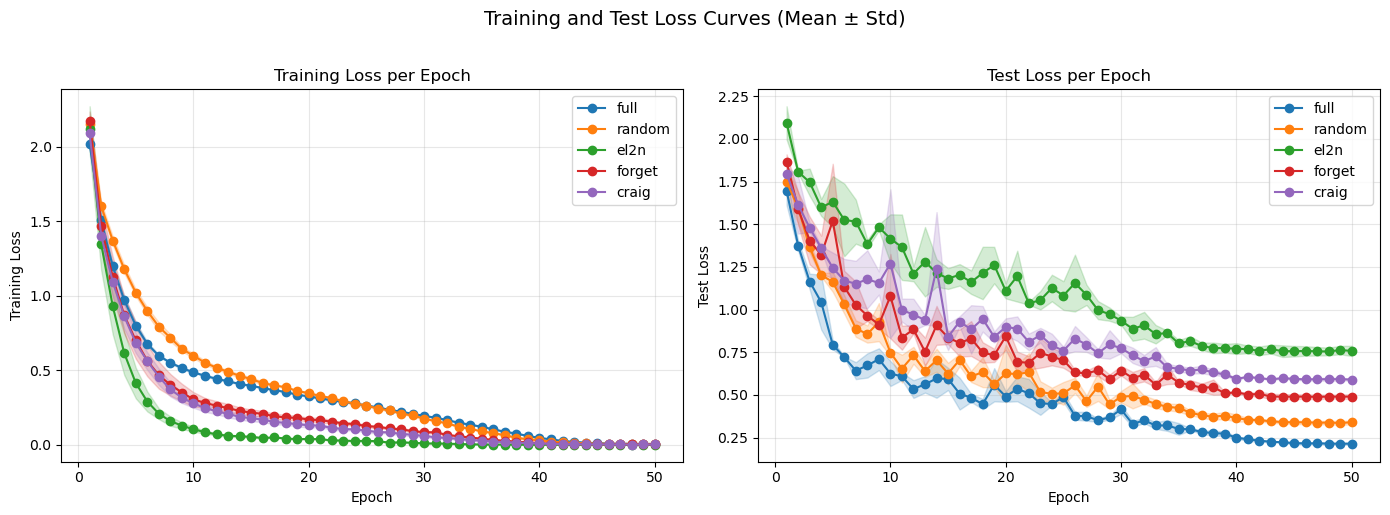

In [8]:
# Plot aggregated loss curves with shaded std regions
plot_aggregated_loss_curves(agg_results, title='Training and Test Loss Curves (Mean ± Std)')

In [9]:
# Save aggregated results (mean ± std) to CSV
save_aggregated_results_csv(agg_results, fname='backdoor_aggregated_results.csv')

Saved aggregated results to backdoor_aggregated_results.csv


In [10]:
# Save aggregated loss history (mean ± std per epoch) to CSV
save_aggregated_loss_history_csv(agg_results, fname='backdoor_aggregated_loss_history.csv')

Saved aggregated loss history to backdoor_aggregated_loss_history.csv


In [11]:
# Save all individual replicate results to CSV
save_all_replicates_csv(agg_results, fname='backdoor_all_replicates.csv')

Saved all replicate results to backdoor_all_replicates.csv
